In [2]:
!pip install tensorflow_hub

     |████████████████████████████████| 92kB 5.3MB/s eta 0:00:01


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [4]:
data = pd.read_csv('./spam.csv', encoding='latin-1')

In [4]:
def encode_label(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode_label(le, one_hot):
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

In [ ]:
#import imdb
#(X_train, y_train), (X_test, y_test) = imdb.load_imdb()

In [5]:
data['label'] = data['v1'].apply(lambda x: 0 if x == 'ham' else 1)

In [8]:
data['v2'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [21]:
y = data['label'].values
x = np.array(data['v2'].values)
X_train = x[:5000]
y_train = y[:5000]
X_test = x[5000:]
y_test = y[5000:]

In [10]:
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence

In [23]:
# set parameters:
vocab_size = 1000
maxlen = 300
batch_size = 32
embedding_dims = 100
hidden_dims = 100
filters = 250
kernel_size = 3
epochs = 10

In [25]:
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_matrix(X_train)
X_test = tokenizer.texts_to_matrix(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, MaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Conv1D, Flatten

In [26]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=maxlen, trainable=True))

model.add(Dropout(0.5))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))
#model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 5000 samples, validate on 572 samples
Epoch 1/10
5000/5000 [==============================] - 16s 3ms/sample - loss: 0.4384 - accuracy: 0.8654 - val_loss: 0.3842 - val_accuracy: 0.8706
Epoch 2/10
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.4060 - accuracy: 0.8654 - val_loss: 0.3609 - val_accuracy: 0.8706
Epoch 3/10
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.3413 - accuracy: 0.8674 - val_loss: 0.3331 - val_accuracy: 0.8951
Epoch 4/10
5000/5000 [==============================] - 16s 3ms/sample - loss: 0.2902 - accuracy: 0.9050 - val_loss: 0.2739 - val_accuracy: 0.9161
Epoch 5/10
5000/5000 [==============================] - 16s 3ms/sample - loss: 0.2646 - accuracy: 0.9286 - val_loss: 0.2576 - val_accuracy: 0.9213
Epoch 6/10
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.2418 - accuracy: 0.9362 - val_loss: 0.2596 - val_accuracy: 0.9266
Epoch 7/10
5000/5000 [==============================] - 15s 3ms/sample 

Example of multiple filters
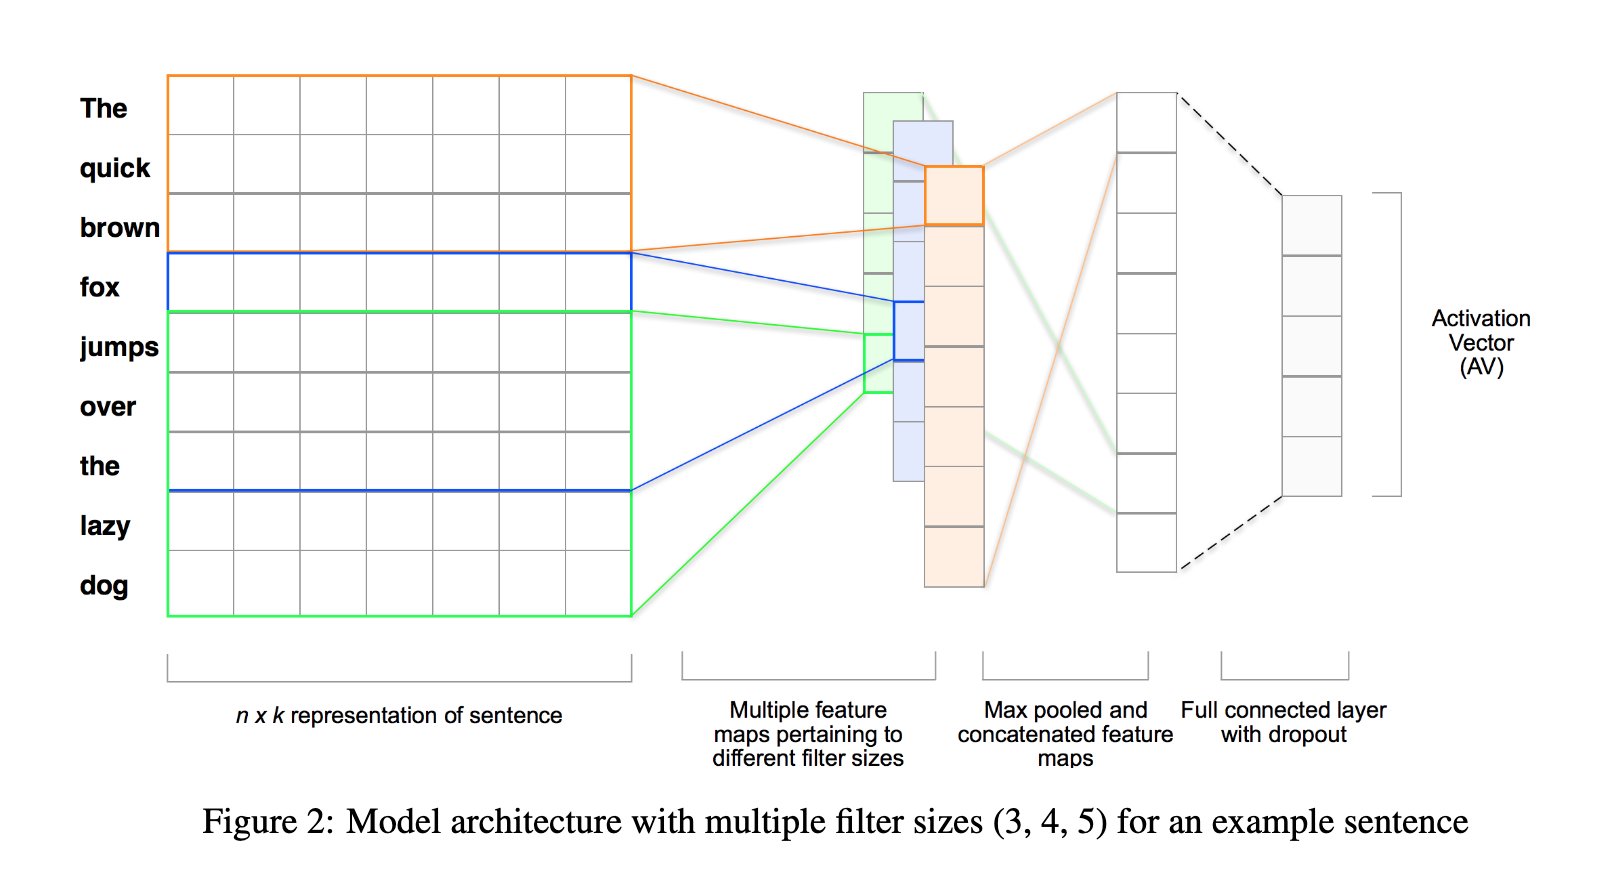

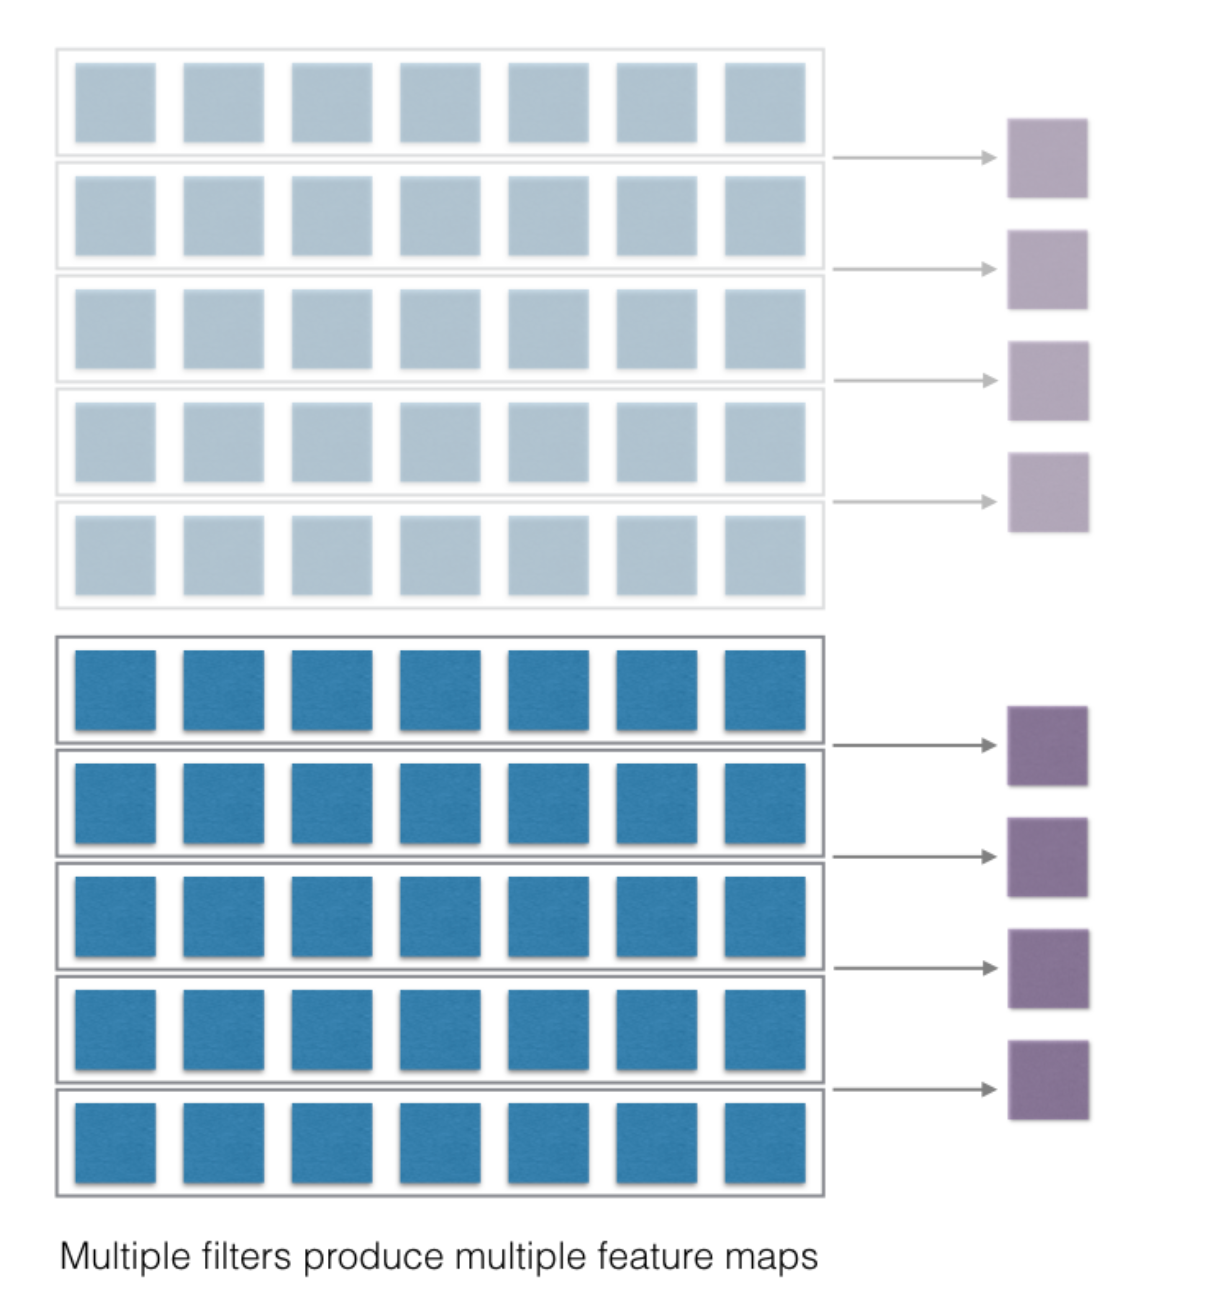

In [28]:
pred_test = model.predict(X_test)

In [29]:
print(pred_test[0])

[0.00141448]


In [31]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, pred_test))
print(metrics.classification_report(y_test, pred_test))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [32]:
embeddings = model.layers[0].get_weights()[0]

In [33]:
embeddings.shape #(num_vocab, embedding_dim)

(1000, 100)

In [34]:
# word to index
word_to_index = tokenizer.word_index
#words_embeddings = {w:embeddings[idx] for w, idx in word_to_index.items()}

# Working with pre-trained embeddings

In [35]:
embeddings_index = dict()
with open('models/GloVe/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [36]:
embedding_matrix = np.zeros((vocab_size, embedding_dims))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [37]:
embedding_matrix[10]

array([ 5.67190014e-02,  1.33330002e-01,  7.26899981e-01, -4.63360012e-01,
       -5.93339980e-01,  7.17459977e-01, -1.17950000e-01,  2.16140002e-01,
        4.30359989e-01, -6.70530021e-01,  5.74800014e-01,  2.68269986e-01,
        2.46590003e-02,  1.60659999e-01,  2.03999996e-01, -3.92459989e-01,
       -6.32939994e-01,  6.29149973e-01, -7.63400018e-01,  1.15810001e+00,
        3.62179995e-01,  3.19319993e-01, -6.56130016e-01, -4.77970004e-01,
        2.98850000e-01,  6.24350011e-01, -4.60599989e-01, -9.62759972e-01,
        1.22140002e+00, -2.31519997e-01, -6.88889995e-02,  6.35190010e-01,
        7.75460005e-01,  3.31279993e-01, -3.52200001e-01,  7.42359996e-01,
       -6.67029977e-01,  3.22600007e-01,  4.34899986e-01, -6.01540029e-01,
       -4.20670003e-01,  2.19909996e-02,  1.63780004e-01, -9.56820011e-01,
       -6.44640028e-01, -9.41110030e-02, -2.71050006e-01, -2.33119994e-01,
       -3.84530008e-01, -1.26650000e+00, -1.82889998e-01,  5.04320025e-01,
       -5.42600006e-02,  

In [38]:
model_glove_emb = Sequential()
model_glove_emb.add(Embedding(vocab_size, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))

model_glove_emb.add(Dropout(0.5))
model_glove_emb.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))

model_glove_emb.add(Flatten())
model_glove_emb.add(Dense(hidden_dims, activation='relu'))
model_glove_emb.add(Dropout(0.5))
model_glove_emb.add(Dense(1, activation='sigmoid'))


model_glove_emb.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
model_glove_emb.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 5000 samples, validate on 572 samples
Epoch 1/10
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.3134 - accuracy: 0.9058 - val_loss: 0.2444 - val_accuracy: 0.9336
Epoch 2/10
5000/5000 [==============================] - 13s 3ms/sample - loss: 0.2232 - accuracy: 0.9386 - val_loss: 0.2340 - val_accuracy: 0.9353
Epoch 3/10
5000/5000 [==============================] - 14s 3ms/sample - loss: 0.2095 - accuracy: 0.9406 - val_loss: 0.2230 - val_accuracy: 0.9318
Epoch 4/10
5000/5000 [==============================] - 14s 3ms/sample - loss: 0.2042 - accuracy: 0.9412 - val_loss: 0.2529 - val_accuracy: 0.9213
Epoch 5/10
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.2018 - accuracy: 0.9422 - val_loss: 0.2210 - val_accuracy: 0.9266
Epoch 6/10
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.1975 - accuracy: 0.9412 - val_loss: 0.2233 - val_accuracy: 0.9283
Epoch 7/10
5000/5000 [==============================] - 15s 3ms/sample 

In [43]:
# very simple example from Brownlee
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[6, 1], [17, 30], [16, 37], [31, 30], [8], [39], [6, 37], [34, 17], [6, 30], [45, 32, 1, 30]]
[[ 6  1  0  0]
 [17 30  0  0]
 [16 37  0  0]
 [31 30  0  0]
 [ 8  0  0  0]
 [39  0  0  0]
 [ 6 37  0  0]
 [34 17  0  0]
 [ 6 30  0  0]
 [45 32  1 30]]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 89.999998


# Full example with imdb dataset

In [44]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Set the number of features we want
max_words = 1000

# Load data and target vector from movie review data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

#print(X_train[0])

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')

# Create Neural model Architecture
model = Sequential()

# Add fully connected layer with a ReLU activation function
model.add(Dense(units=24, activation='relu', input_shape=(max_words,)))

# Add fully connected layer with a ReLU activation function
model.add(Dense(units=24, activation='relu'))

# Add fully connected layer with a sigmoid activation function
model.add(Dense(units=1, activation='sigmoid'))

# Compile neural model
model.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

model.summary()


# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)]


# Train neural model
history = model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=1, # Number of epochs
                      callbacks=callbacks, # Early stopping
                      verbose=1, # Print description after each epoch
                      batch_size=120, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 24)                24024     
_________________________________________________________________
dense_11 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 24,649
Trainable params: 24,649
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
23280/25000 [==========================>...] - ETA: 0s - loss: 0.4288 - accuracy: 0.8105
Epoch 00001: val_loss improved from inf to 0.35424, saving model to best_model.h5
25000/25000 [==============================] - 1s 41us/sample - loss: 0.4229 - accuracy: 0.8136 - val_loss: 0.3542 - val_accuracy: 0.8473
